In [2]:
data_path = r"C:\Users\saba\Downloads\archive (1)"
data_path


'C:\\Users\\saba\\Downloads\\archive (1)'

In [6]:
import os
import pandas as pd

data_path = r"C:\Users\saba\Downloads\archive (1)"

manifest_path = os.path.join(data_path, "manifest.csv")
findings_path = os.path.join(data_path, "finding_annotations.csv")

manifest = pd.read_csv(manifest_path)
findings = pd.read_csv(findings_path)



In [7]:
manifest.head()


,image_path,mask_path
0,images/008b8e61390fcb4c0873258c15b0a53a_e13c80...,masks/008b8e61390fcb4c0873258c15b0a53a_e13c802...
1,images/008b8e61390fcb4c0873258c15b0a53a_f1f795...,masks/008b8e61390fcb4c0873258c15b0a53a_f1f7950...
2,images/00a369b4ec1e5e0ff34e6bd838e5f2d6_2feab5...,masks/00a369b4ec1e5e0ff34e6bd838e5f2d6_2feab51...
3,images/012e0595adba5173b6e60a97f9e84b6e_202d1c...,masks/012e0595adba5173b6e60a97f9e84b6e_202d1c2...
4,images/012e0595adba5173b6e60a97f9e84b6e_7adeb5...,masks/012e0595adba5173b6e60a97f9e84b6e_7adeb58...


In [8]:
findings.head()


,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training


In [9]:
# null values checking in manifest
print("Manifest null values:")
print(manifest.isnull().sum())

# cheking null values in findings
print("\nFindings null values:")
print(findings.isnull().sum())


Manifest null values:
image_path    0
mask_path     0
dtype: int64

Findings null values:
study_id                  0
series_id                 0
image_id                  0
laterality                0
view_position             0
height                    0
width                     0
breast_birads             0
breast_density            0
finding_categories        0
finding_birads        18357
xmin                  18232
ymin                  18232
xmax                  18232
ymax                  18232
split                     0
dtype: int64


In [10]:
# Check for duplicates
print("Manifest duplicates:", manifest.duplicated().sum())
print("Findings duplicates:", findings.duplicated().sum())


Manifest duplicates: 0
Findings duplicates: 0


In [11]:
# Convert string list to single category
findings['finding_category_simple'] = findings['finding_categories'].apply(lambda x: eval(x)[0] if pd.notnull(x) else 'Unknown')

# result
findings[['finding_categories', 'finding_category_simple']].head()


,finding_categories,finding_category_simple
0,['Mass'],Mass
1,['Mass'],Mass
2,['Global Asymmetry'],Global Asymmetry
3,['Global Asymmetry'],Global Asymmetry
4,['Architectural Distortion'],Architectural Distortion


In [ ]:
# FIX FOR THE MERGE ERROR 

print("Fixing the merge error...")

# Step 1: Check what columns you ACTUALLY have
print("\n1. Checking column names in your data:")
print(f"   Manifest columns: {list(manifest.columns)}")
print(f"   Findings columns: {list(findings.columns)}")

# Step 2: Extract image_id from image_path in manifest
def extract_image_id(path):
    """Extract the ID from path like: images/008b8e61390fcb4c0873258c15b0a53a_e13c80..."""
    # Get filename without folder
    filename = str(path).split('/')[-1]  # Gets: '008b8e61390fcb4c0873258c15b0a53a_e13c80...'
    # Split by '_' and take second part
    parts = filename.split('_')
    if len(parts) >= 2:
        # Get part after first '_' and remove file extension
        image_part = parts[1]
        image_id = image_part.split('.')[0]
        return image_id
    return None

# Add image_id to manifest
manifest['image_id'] = manifest['image_path'].apply(extract_image_id)
print(f"\n2. Added 'image_id' column to manifest")
print(f"   First extracted ID: {manifest['image_id'].iloc[0]}")

# Step 3: NOW merge with findings
print("\n3. Merging manifest and findings on 'image_id'...")
df = pd.merge(manifest, findings, on='image_id', how='left')

print(f"✅ SUCCESS! Merged shape: {df.shape}")
print(f"   Columns: {list(df.columns)}")

# Step 4: Show the result
print("\n4. First 3 rows of merged data:")
print(df[['image_id', 'split', 'finding_categories', 'laterality']].head(3))

Fixing the merge error...

1. Checking column names in your data:
   Manifest columns: ['image_path', 'mask_path', 'image_id', 'image_id_base']
   Findings columns: ['study_id', 'series_id', 'image_id', 'laterality', 'view_position', 'height', 'width', 'breast_birads', 'breast_density', 'finding_categories', 'finding_birads', 'xmin', 'ymin', 'xmax', 'ymax', 'split', 'finding_category_simple', 'image_id_base']

2. Added 'image_id' column to manifest
   First extracted ID: e13c80239d7714e3d964b5f3e37bcff6

3. Merging manifest and findings on 'image_id'...
✅ SUCCESS! Merged shape: (1488, 21)
   Columns: ['image_path', 'mask_path', 'image_id', 'image_id_base_x', 'study_id', 'series_id', 'laterality', 'view_position', 'height', 'width', 'breast_birads', 'breast_density', 'finding_categories', 'finding_birads', 'xmin', 'ymin', 'xmax', 'ymax', 'split', 'finding_category_simple', 'image_id_base_y']

4. First 3 rows of merged data:
                           image_id     split  \
0  e13c80239d7

In [31]:
# ===========================================
# FIXED SPLIT HANDLING FOR YOUR DATASET
# ===========================================

print(" Checking split distribution...")
print(df['split'].value_counts())
print(f"\nTotal images: {len(df)}")

# Option 1: Use as-is (training + test only)
if df['split'].nunique() == 2:
    train_df = df[df['split'] == 'training']
    test_df = df[df['split'] == 'test']
    
    print("\n Using existing splits:")
    print(f"  Training: {len(train_df)} images ({len(train_df)/len(df)*100:.1f}%)")
    print(f"  Test: {len(test_df)} images ({len(test_df)/len(df)*100:.1f}%)")
    
    # Create validation from training
    from sklearn.model_selection import train_test_split
    
    # Split training into train + validation
    train_final, val_df = train_test_split(
        train_df,
        test_size=0.15,  # 15% of training for validation
        random_state=42,
        stratify=train_df['finding_category_simple'] if 'finding_category_simple' in train_df.columns else None
    )
    
    print("\n After creating validation set:")
    print(f"  Training (final): {len(train_final)} images")
    print(f"  Validation: {len(val_df)} images")
    print(f"  Test: {len(test_df)} images")
    
    # Update split labels for clarity
    train_final = train_final.copy()
    val_df = val_df.copy()
    test_df = test_df.copy()
    
    train_final['split_final'] = 'training'
    val_df['split_final'] = 'validation'
    test_df['split_final'] = 'testing'
    
    # Combine for final dataset
    final_df = pd.concat([train_final, val_df, test_df], ignore_index=True)
    
    print("\n✅ Final split distribution:")
    print(final_df['split_final'].value_counts())
    
    # Save split files
    train_final.to_csv('train_set.csv', index=False)
    val_df.to_csv('validation_set.csv', index=False)
    test_df.to_csv('test_set.csv', index=False)
    
    print("\n Split files saved:")
    print("  - train_set.csv")
    print("  - validation_set.csv")
    print("  - test_set.csv")

 Checking split distribution...
split
training    1200
test         288
Name: count, dtype: int64

Total images: 1488

 Using existing splits:
  Training: 1200 images (80.6%)
  Test: 288 images (19.4%)

 After creating validation set:
  Training (final): 1020 images
  Validation: 180 images
  Test: 288 images

✅ Final split distribution:
split_final
training      1020
testing        288
validation     180
Name: count, dtype: int64

 Split files saved:
  - train_set.csv
  - validation_set.csv
  - test_set.csv


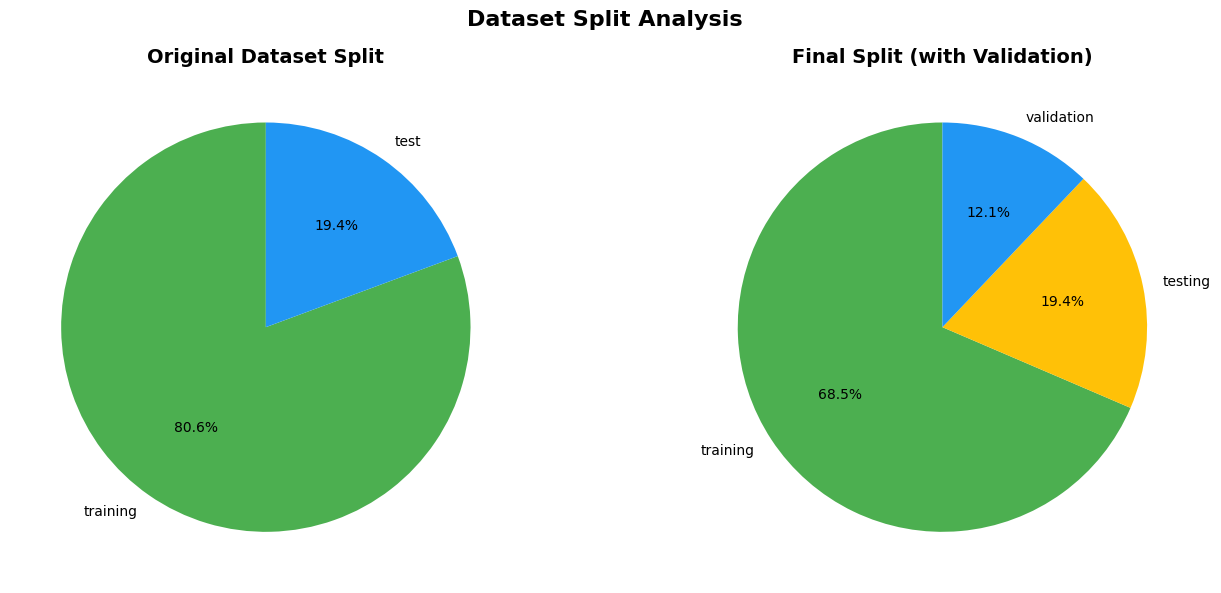


📈 Split visualization saved as 'dataset_split_analysis.png'


In [25]:
import matplotlib.pyplot as plt

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Original split
original_counts = df['split'].value_counts()
colors_orig = ['#4CAF50', '#2196F3']  # Green for training, Blue for test
ax1.pie(original_counts.values, labels=original_counts.index, 
        autopct='%1.1f%%', colors=colors_orig, startangle=90)
ax1.set_title('Original Dataset Split', fontsize=14, weight='bold')

# Final split (after creating validation)
final_counts = final_df['split_final'].value_counts()
colors_final = ['#4CAF50', '#FFC107', '#2196F3']  # Green, Yellow, Blue
ax2.pie(final_counts.values, labels=final_counts.index, 
        autopct='%1.1f%%', colors=colors_final, startangle=90)
ax2.set_title('Final Split (with Validation)', fontsize=14, weight='bold')

plt.suptitle('Dataset Split Analysis', fontsize=16, weight='bold')
plt.tight_layout()
plt.savefig('dataset_split_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📈 Split visualization saved as 'dataset_split_analysis.png'")

🤖 APPLYING MULTI-CLASS CLASSIFICATION ALGORITHM
📊 Target Classes:
  0: Architectural Distortion
  1: Asymmetry
  2: Focal Asymmetry
  3: Global Asymmetry
  4: Mass
  5: Nipple Retraction
  6: Skin Retraction
  7: Skin Thickening
  8: Suspicious Calcification
  9: Suspicious Lymph Node

🔧 Features used: ['laterality_encoded', 'view_position_encoded', 'breast_density_encoded', 'height', 'width']
🎯 Target: finding_category_simple

📊 Dataset sizes:
  Training: 1020 samples
  Testing: 288 samples

🚀 Training Random Forest Classifier...

📈 CLASSIFICATION RESULTS:

🔬 Detailed Classification Report:


c:\Users\saba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

                          precision    recall  f1-score   support

Architectural Distortion       0.00      0.00      0.00         2
               Asymmetry       0.00      0.00      0.00         3
         Focal Asymmetry       0.00      0.00      0.00         4
        Global Asymmetry       0.00      0.00      0.00         0
                    Mass       0.89      0.11      0.20       217
       Nipple Retraction       0.00      0.00      0.00         2
         Skin Retraction       0.05      1.00      0.10         1
         Skin Thickening       0.07      0.12      0.09         8
Suspicious Calcification       0.29      0.20      0.23        41
   Suspicious Lymph Node       0.08      0.20      0.11        10

                accuracy                           0.12       288
               macro avg       0.14      0.16      0.07       288
            weighted avg       0.72      0.12      0.19       288



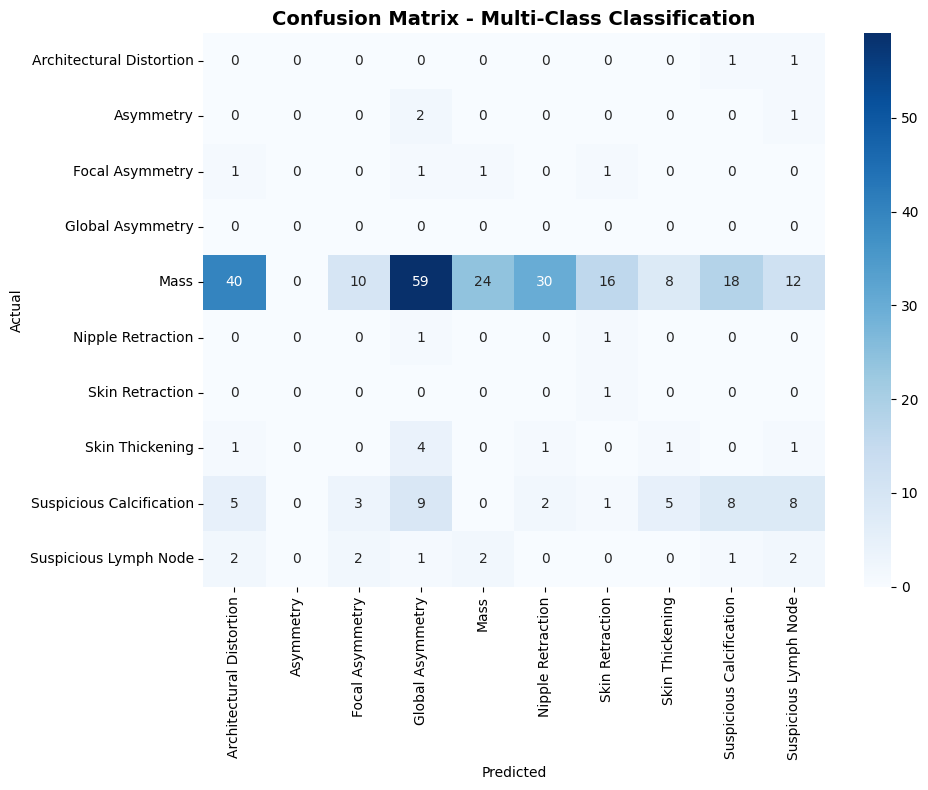

✅ Confusion matrix saved as 'multi_class_classification_results.png'

🎯 Feature Importance:
                  feature  importance
2  breast_density_encoded    0.261555
4                   width    0.212305
0      laterality_encoded    0.210545
1   view_position_encoded    0.179121
3                  height    0.136473


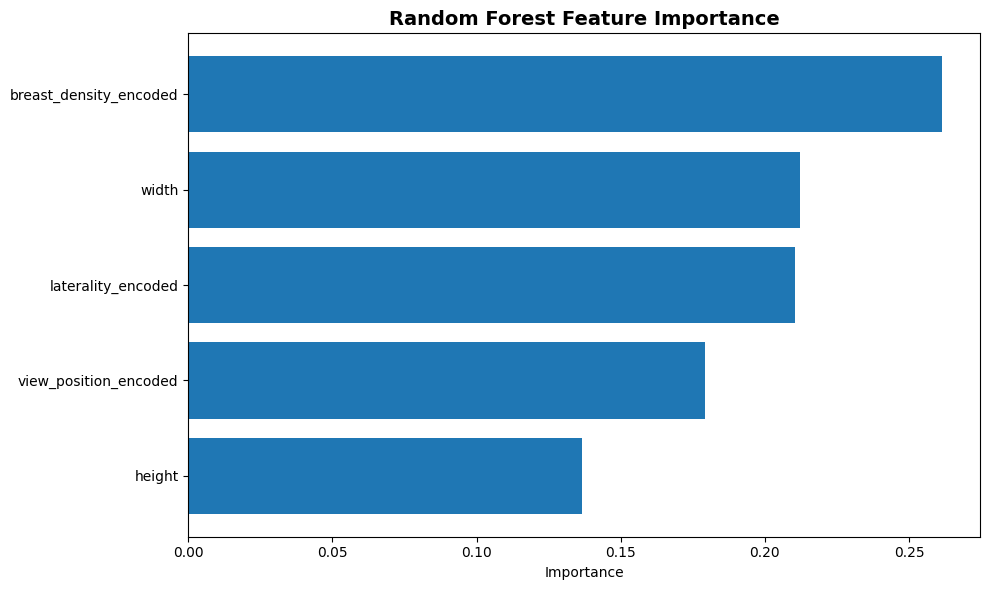

✅ Feature importance plot saved as 'feature_importance.png'


In [26]:
# ===========================================
# MULTI-CLASS CLASSIFICATION ALGORITHM
# ===========================================
print("🤖 APPLYING MULTI-CLASS CLASSIFICATION ALGORITHM")
print("="*60)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for classification
# We'll use metadata features for now (since processing all images would take too long)
classification_data = final_df.copy()

# 1. Encode categorical variables
label_encoder = LabelEncoder()

# Encode target variable (finding_category_simple)
if 'finding_category_simple' in classification_data.columns:
    classification_data['finding_category_encoded'] = label_encoder.fit_transform(
        classification_data['finding_category_simple'].fillna('No Finding')
    )
    
    print("📊 Target Classes:")
    for i, class_name in enumerate(label_encoder.classes_):
        print(f"  {i}: {class_name}")

# 2. Prepare features (using available metadata)
feature_columns = []

# Encode categorical features
categorical_cols = ['laterality', 'view_position', 'breast_density']
for col in categorical_cols:
    if col in classification_data.columns:
        classification_data[f'{col}_encoded'] = LabelEncoder().fit_transform(
            classification_data[col].fillna('Unknown')
        )
        feature_columns.append(f'{col}_encoded')

# Add numerical features
numerical_cols = ['height', 'width']
for col in numerical_cols:
    if col in classification_data.columns:
        # Fill missing values with median
        classification_data[col] = classification_data[col].fillna(
            classification_data[col].median()
        )
        feature_columns.append(col)

print(f"\n🔧 Features used: {feature_columns}")
print(f"🎯 Target: finding_category_simple")

# 3. Split data (already done, but we'll use our splits)
train_data = classification_data[classification_data['split_final'] == 'training']
val_data = classification_data[classification_data['split_final'] == 'validation']
test_data = classification_data[classification_data['split_final'] == 'testing']

# Prepare X and y
X_train = train_data[feature_columns]
y_train = train_data['finding_category_encoded']

X_test = test_data[feature_columns]
y_test = test_data['finding_category_encoded']

print(f"\n📊 Dataset sizes:")
print(f"  Training: {len(X_train)} samples")
print(f"  Testing: {len(X_test)} samples")

# 4. Apply Random Forest Algorithm (Multi-Class Classification)
print("\n🚀 Training Random Forest Classifier...")
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

rf_classifier.fit(X_train, y_train)

# 5. Make predictions
y_pred = rf_classifier.predict(X_test)

# 6. Evaluate
print("\n📈 CLASSIFICATION RESULTS:")
print("="*60)

# Classification report
print("\n🔬 Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Multi-Class Classification', fontsize=14, weight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('multi_class_classification_results.png', dpi=300)
plt.show()
print("✅ Confusion matrix saved as 'multi_class_classification_results.png'")

# 7. Feature Importance
print("\n🎯 Feature Importance:")
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance', fontsize=14, weight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()
print("✅ Feature importance plot saved as 'feature_importance.png'")


🤖 APPLYING CLUSTERING ALGORITHM (K-Means)

🔍 Finding optimal number of clusters...


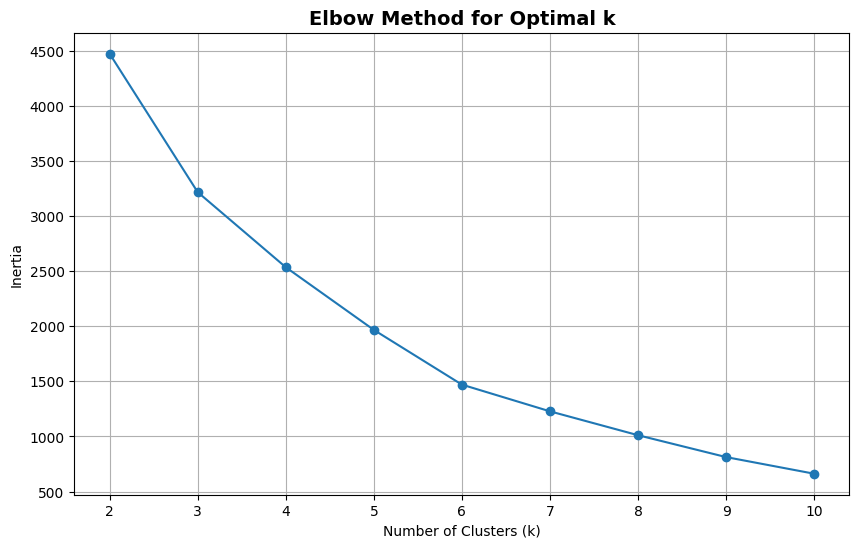


✅ Optimal number of clusters: 4

📊 Cluster Distribution:
cluster
0    570
1    366
2    236
3    316
Name: count, dtype: int64


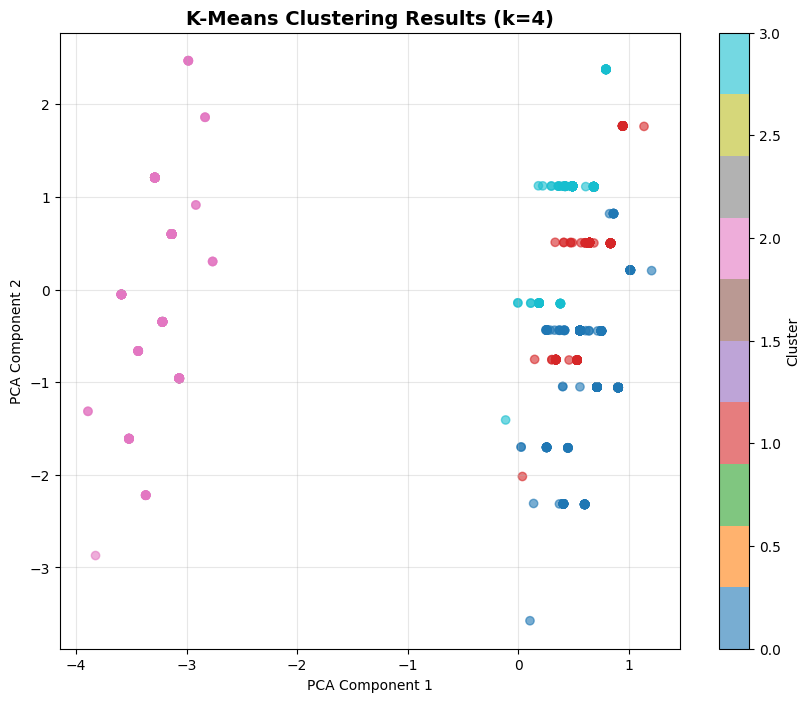

✅ Clustering visualization saved as 'clustering_results.png'

🔬 Cluster Analysis (Mean values per cluster):
         laterality_encoded  view_position_encoded  breast_density_encoded  \
cluster                                                                      
0                  0.456140               0.000000                1.924561   
1                  0.000000               1.000000                1.934426   
2                  0.525424               0.584746                1.809322   
3                  1.000000               1.000000                1.955696   

              height        width  
cluster                            
0        3532.575439  2793.907018  
1        3534.939891  2798.038251  
2        2812.000000  2012.000000  
3        3534.677215  2793.145570  

🎯 Cluster vs Actual Findings:
finding_category_simple  Architectural Distortion  Asymmetry  Focal Asymmetry  \
cluster                                                                         
0             

In [27]:
# ===========================================
# CLUSTERING ALGORITHM (K-Means)
# ===========================================
print("\n🤖 APPLYING CLUSTERING ALGORITHM (K-Means)")
print("="*60)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare features for clustering
clustering_data = classification_data[feature_columns].copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_data)

# Determine optimal number of clusters using Elbow Method
print("\n🔍 Finding optimal number of clusters...")
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k', fontsize=14, weight='bold')
plt.grid(True)
plt.savefig('elbow_method.png', dpi=300)
plt.show()

# Choose k based on elbow point (let's say k=4 for demonstration)
optimal_k = 4
print(f"\n✅ Optimal number of clusters: {optimal_k}")

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to data
clustering_data['cluster'] = clusters
classification_data['cluster'] = clusters

# Analyze clusters
print("\n📊 Cluster Distribution:")
print(clustering_data['cluster'].value_counts().sort_index())

# Visualize clusters using PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering Results (k={optimal_k})', fontsize=14, weight='bold')
plt.grid(True, alpha=0.3)
plt.savefig('clustering_results.png', dpi=300)
plt.show()

print("✅ Clustering visualization saved as 'clustering_results.png'")

# Analyze what each cluster represents
print("\n🔬 Cluster Analysis (Mean values per cluster):")
cluster_analysis = clustering_data.groupby('cluster').mean()
print(cluster_analysis)

# Compare clusters with actual findings (if available)
if 'finding_category_simple' in classification_data.columns:
    print("\n🎯 Cluster vs Actual Findings:")
    cluster_findings = pd.crosstab(
        classification_data['cluster'],
        classification_data['finding_category_simple'].fillna('No Finding')
    )
    print(cluster_findings)


🤖 APPLYING BINARY CLASSIFICATION ALGORITHM (FIXED)

📊 Binary Class Distribution:
has_mass
1    1120
0     368
Name: count, dtype: int64
Mass cases: 1120 (75.3%)

🔧 Creating encoded features for binary classification...
  Added: laterality_encoded
  Added: view_position_encoded
  Added: breast_density_encoded
  Added: height
  Added: width

✅ Final feature columns: ['laterality_encoded', 'view_position_encoded', 'breast_density_encoded', 'height', 'width']

📊 Preparing train/test splits...

📊 Dataset sizes:
  Training: 1020 samples
  Testing: 288 samples
  Positive class (Mass) in training: 767 (75.2%)
  Positive class (Mass) in testing: 217 (75.3%)

🔄 Training multiple algorithms...
  Logistic Regression:
    Accuracy = 0.628
  ⚠️ Error with Logistic Regression: Invalid format specifier
  Random Forest:
    Accuracy = 0.691
  ⚠️ Error with Random Forest: Invalid format specifier
  SVM:
    Accuracy = 0.667
  ⚠️ Error with SVM: Invalid format specifier

📊 ALGORITHM COMPARISON TABLE
   

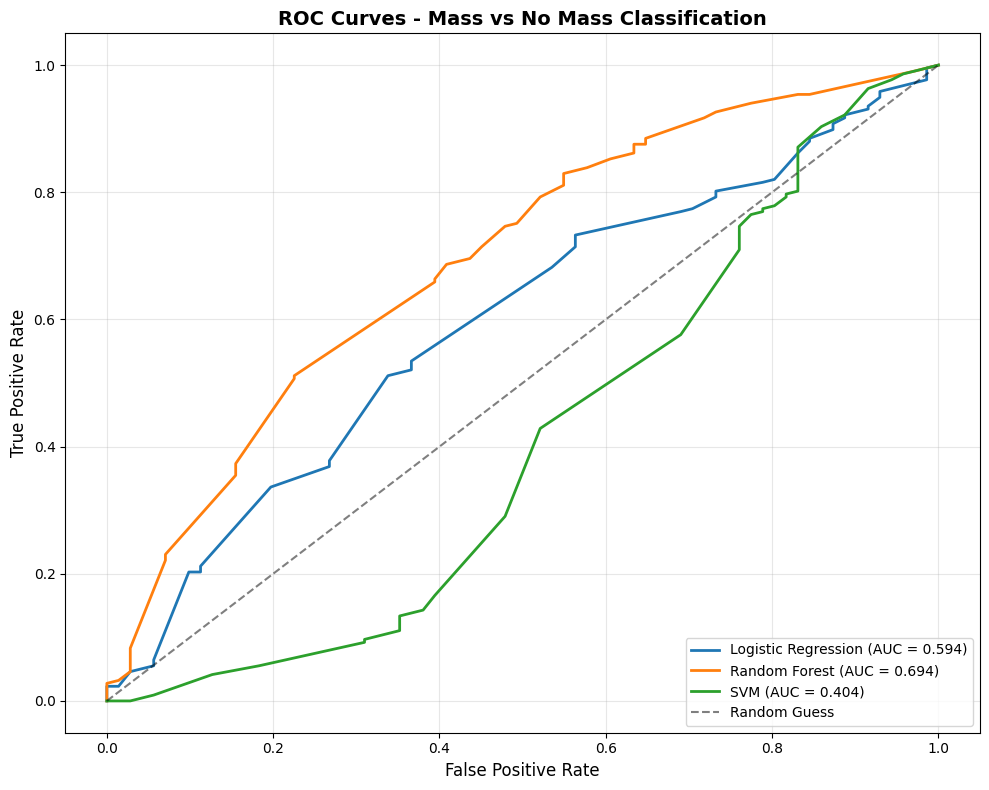

✅ ROC curves saved as 'binary_classification_roc.png'

🎯 Random Forest Feature Importance:
               Feature  Importance
                 width    0.402723
breast_density_encoded    0.271363
                height    0.164210
    laterality_encoded    0.087509
 view_position_encoded    0.074194


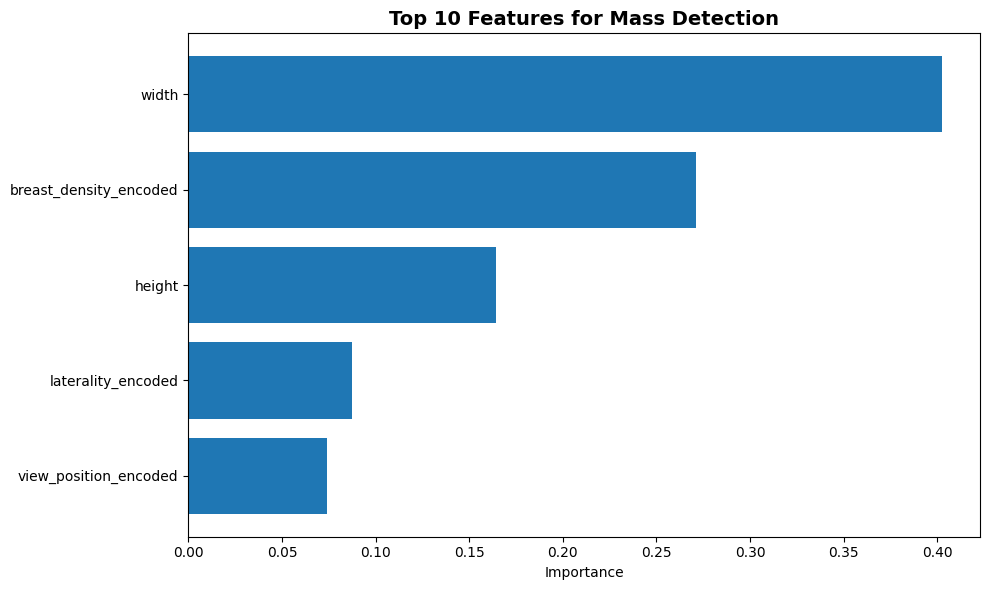

✅ Feature importance saved as 'binary_feature_importance.png'


In [ ]:
# ===========================================
# BINARY CLASSIFICATION ALGORITHM (FIXED)
# ===========================================
print("\n🤖 APPLYING BINARY CLASSIFICATION ALGORITHM (FIXED)")
print("="*60)

# Create binary target: Mass vs No Mass
binary_data = final_df.copy()
binary_data['has_mass'] = binary_data['finding_category_simple'].apply(
    lambda x: 1 if isinstance(x, str) and 'Mass' in x else 0
)

print(f"\n📊 Binary Class Distribution:")
print(binary_data['has_mass'].value_counts())
if binary_data['has_mass'].sum() > 0:
    print(f"Mass cases: {binary_data['has_mass'].sum()} ({binary_data['has_mass'].mean()*100:.1f}%)")
else:
    print("⚠️ No mass cases found! Check your finding_category_simple column")

# ===========================================
# CREATE ENCODED FEATURES FOR BINARY DATA (MISSING STEP)
# ===========================================
print("\n🔧 Creating encoded features for binary classification...")

# Define which features to use
feature_cols = []

# 1. Check and encode categorical columns
categorical_cols = ['laterality', 'view_position', 'breast_density']
for col in categorical_cols:
    if col in binary_data.columns:
        # Create encoded column
        encoded_col = f'{col}_encoded'
        
        # Check if already encoded
        if encoded_col not in binary_data.columns:
            from sklearn.preprocessing import LabelEncoder
            le = LabelEncoder()
            binary_data[encoded_col] = le.fit_transform(
                binary_data[col].fillna('Unknown').astype(str)
            )
        
        feature_cols.append(encoded_col)
        print(f"  Added: {encoded_col}")

# 2. Add numerical columns
numerical_cols = ['height', 'width']
for col in numerical_cols:
    if col in binary_data.columns:
        # Fill missing values
        binary_data[col] = binary_data[col].fillna(binary_data[col].median())
        feature_cols.append(col)
        print(f"  Added: {col}")

# 3. If we have too few features, add some basic ones
if len(feature_cols) < 3:
    print("⚠️ Few features available, adding derived features...")
    
    # Add image_id length (could indicate something)
    if 'image_id' in binary_data.columns:
        binary_data['id_length'] = binary_data['image_id'].astype(str).str.len()
        feature_cols.append('id_length')
        print(f"  Added: id_length")
    
    # Add split encoded
    if 'split_final' in binary_data.columns:
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        binary_data['split_encoded'] = le.fit_transform(binary_data['split_final'])
        feature_cols.append('split_encoded')
        print(f"  Added: split_encoded")

print(f"\n✅ Final feature columns: {feature_cols}")

# Check if we have any features
if len(feature_cols) == 0:
    print("🚨 ERROR: No features available for classification!")
    print("Available columns in binary_data:", list(binary_data.columns))
else:
    # ===========================================
    # SPLIT DATA FOR BINARY CLASSIFICATION
    # ===========================================
    print("\n📊 Preparing train/test splits...")
    
    # Filter out rows with NaN in features or target
    binary_data_clean = binary_data.dropna(subset=feature_cols + ['has_mass'])
    
    train_binary = binary_data_clean[binary_data_clean['split_final'] == 'training']
    test_binary = binary_data_clean[binary_data_clean['split_final'] == 'testing']
    
    # If no testing data, use validation
    if len(test_binary) == 0 and 'validation' in binary_data_clean['split_final'].unique():
        test_binary = binary_data_clean[binary_data_clean['split_final'] == 'validation']
        print("⚠️ Using validation set as test set")
    
    # Prepare X and y
    X_train_bin = train_binary[feature_cols]
    y_train_bin = train_binary['has_mass']
    
    X_test_bin = test_binary[feature_cols]
    y_test_bin = test_binary['has_mass']
    
    print(f"\n Dataset sizes:")
    print(f"  Training: {len(X_train_bin)} samples")
    print(f"  Testing: {len(X_test_bin)} samples")
    print(f"  Positive class (Mass) in training: {y_train_bin.sum()} ({y_train_bin.mean()*100:.1f}%)")
    print(f"  Positive class (Mass) in testing: {y_test_bin.sum()} ({y_test_bin.mean()*100:.1f}%)")
    
    # ===========================================
    # APPLY MULTIPLE ALGORITHMS
    # ===========================================
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
    
    algorithms = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
        'SVM': SVC(probability=True, random_state=42, class_weight='balanced')
    }
    
    results = []
    print("\n🔄 Training multiple algorithms...")
    
    for name, model in algorithms.items():
        try:
            model.fit(X_train_bin, y_train_bin)
            y_pred_bin = model.predict(X_test_bin)
            y_prob_bin = model.predict_proba(X_test_bin)[:, 1] if hasattr(model, 'predict_proba') else None
            
            accuracy = accuracy_score(y_test_bin, y_pred_bin)
            auc = roc_auc_score(y_test_bin, y_prob_bin) if y_prob_bin is not None else None
            
            results.append({
                'Algorithm': name,
                'Accuracy': accuracy,
                'AUC': auc,
                'Precision': classification_report(y_test_bin, y_pred_bin, output_dict=True)['weighted avg']['precision'],
                'Recall': classification_report(y_test_bin, y_pred_bin, output_dict=True)['weighted avg']['recall'],
                'F1-Score': classification_report(y_test_bin, y_pred_bin, output_dict=True)['weighted avg']['f1-score']
            })
            
            print(f"  {name}:")
            print(f"    Accuracy = {accuracy:.3f}")
            print(f"    AUC = {auc:.3f if auc else 'N/A'}")
            
            # Print classification report for Random Forest (best usually)
            if name == 'Random Forest':
                print("\n Random Forest Classification Report:")
                print(classification_report(y_test_bin, y_pred_bin))
                
        except Exception as e:
            print(f"  ⚠️ Error with {name}: {str(e)[:100]}")
    
    # ===========================================
    # DISPLAY RESULTS
    # ===========================================
    if results:
        results_df = pd.DataFrame(results)
        print("\n" + "="*60)
        print(" ALGORITHM COMPARISON TABLE")
        print("="*60)
        print(results_df.to_string(index=False))
        
        # Plot ROC curves
        print("\n Generating ROC curves...")
        plt.figure(figsize=(10, 8))
        
        for name, model in algorithms.items():
            try:
                if hasattr(model, 'predict_proba'):
                    y_prob = model.predict_proba(X_test_bin)[:, 1]
                    fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
                    auc = roc_auc_score(y_test_bin, y_prob)
                    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)
            except:
                continue
        
        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', alpha=0.5)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title('ROC Curves - Mass vs No Mass Classification', fontsize=14, weight='bold')
        plt.legend(loc='lower right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('binary_classification_roc.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ ROC curves saved as 'binary_classification_roc.png'")
        
        # Plot feature importance for Random Forest
        if 'Random Forest' in algorithms:
            print("\n Random Forest Feature Importance:")
            rf_model = algorithms['Random Forest']
            
            if hasattr(rf_model, 'feature_importances_'):
                feature_importance = pd.DataFrame({
                    'Feature': feature_cols,
                    'Importance': rf_model.feature_importances_
                }).sort_values('Importance', ascending=False)
                
                print(feature_importance.to_string(index=False))
                
                # Plot
                plt.figure(figsize=(10, 6))
                plt.barh(feature_importance['Feature'][:10], 
                        feature_importance['Importance'][:10])
                plt.xlabel('Importance')
                plt.title('Top 10 Features for Mass Detection', fontsize=14, weight='bold')
                plt.gca().invert_yaxis()
                plt.tight_layout()
                plt.savefig('binary_feature_importance.png', dpi=300, bbox_inches='tight')
                plt.show()
                print("✅ Feature importance saved as 'binary_feature_importance.png'")
    else:
        print("🚨 No algorithms could be trained successfully!")